In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*1]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

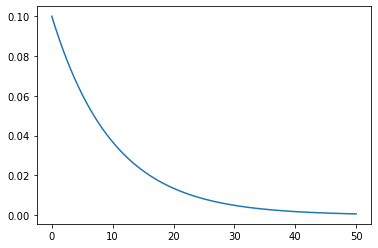

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
#lmd = lambda_dist.rvs(1)
#print(lmd)
w_dist = gen_w_dist(10)

In [5]:
w_dist.rvs(10)

array([[ 0.28027367, -0.00306685,  0.0901097 ,  0.407006  , -0.3895412 ],
       [-0.56595847,  0.10994798, -0.0775028 ,  0.29531413, -0.00962196],
       [-0.23973773, -0.57523586, -0.29855941,  0.24516241, -0.23573358],
       [-0.4462132 ,  0.58854843,  0.14286756, -0.35532969, -0.45235522],
       [ 0.27474822, -0.03148543, -0.34829002, -0.35416066, -0.21966492],
       [ 0.11501008,  0.20587023, -0.04565435, -0.24257277, -0.13861473],
       [ 0.28979657, -0.04755055,  0.48664467, -0.47821565,  0.28178564],
       [ 0.56328925,  0.16605095,  0.06638209, -0.40102966,  0.12502137],
       [-0.35813522, -0.11540963, -0.24594343,  0.32216869,  0.22694361],
       [ 0.39435522,  0.08751485, -0.33122523, -0.05988163, -0.11530973]])

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

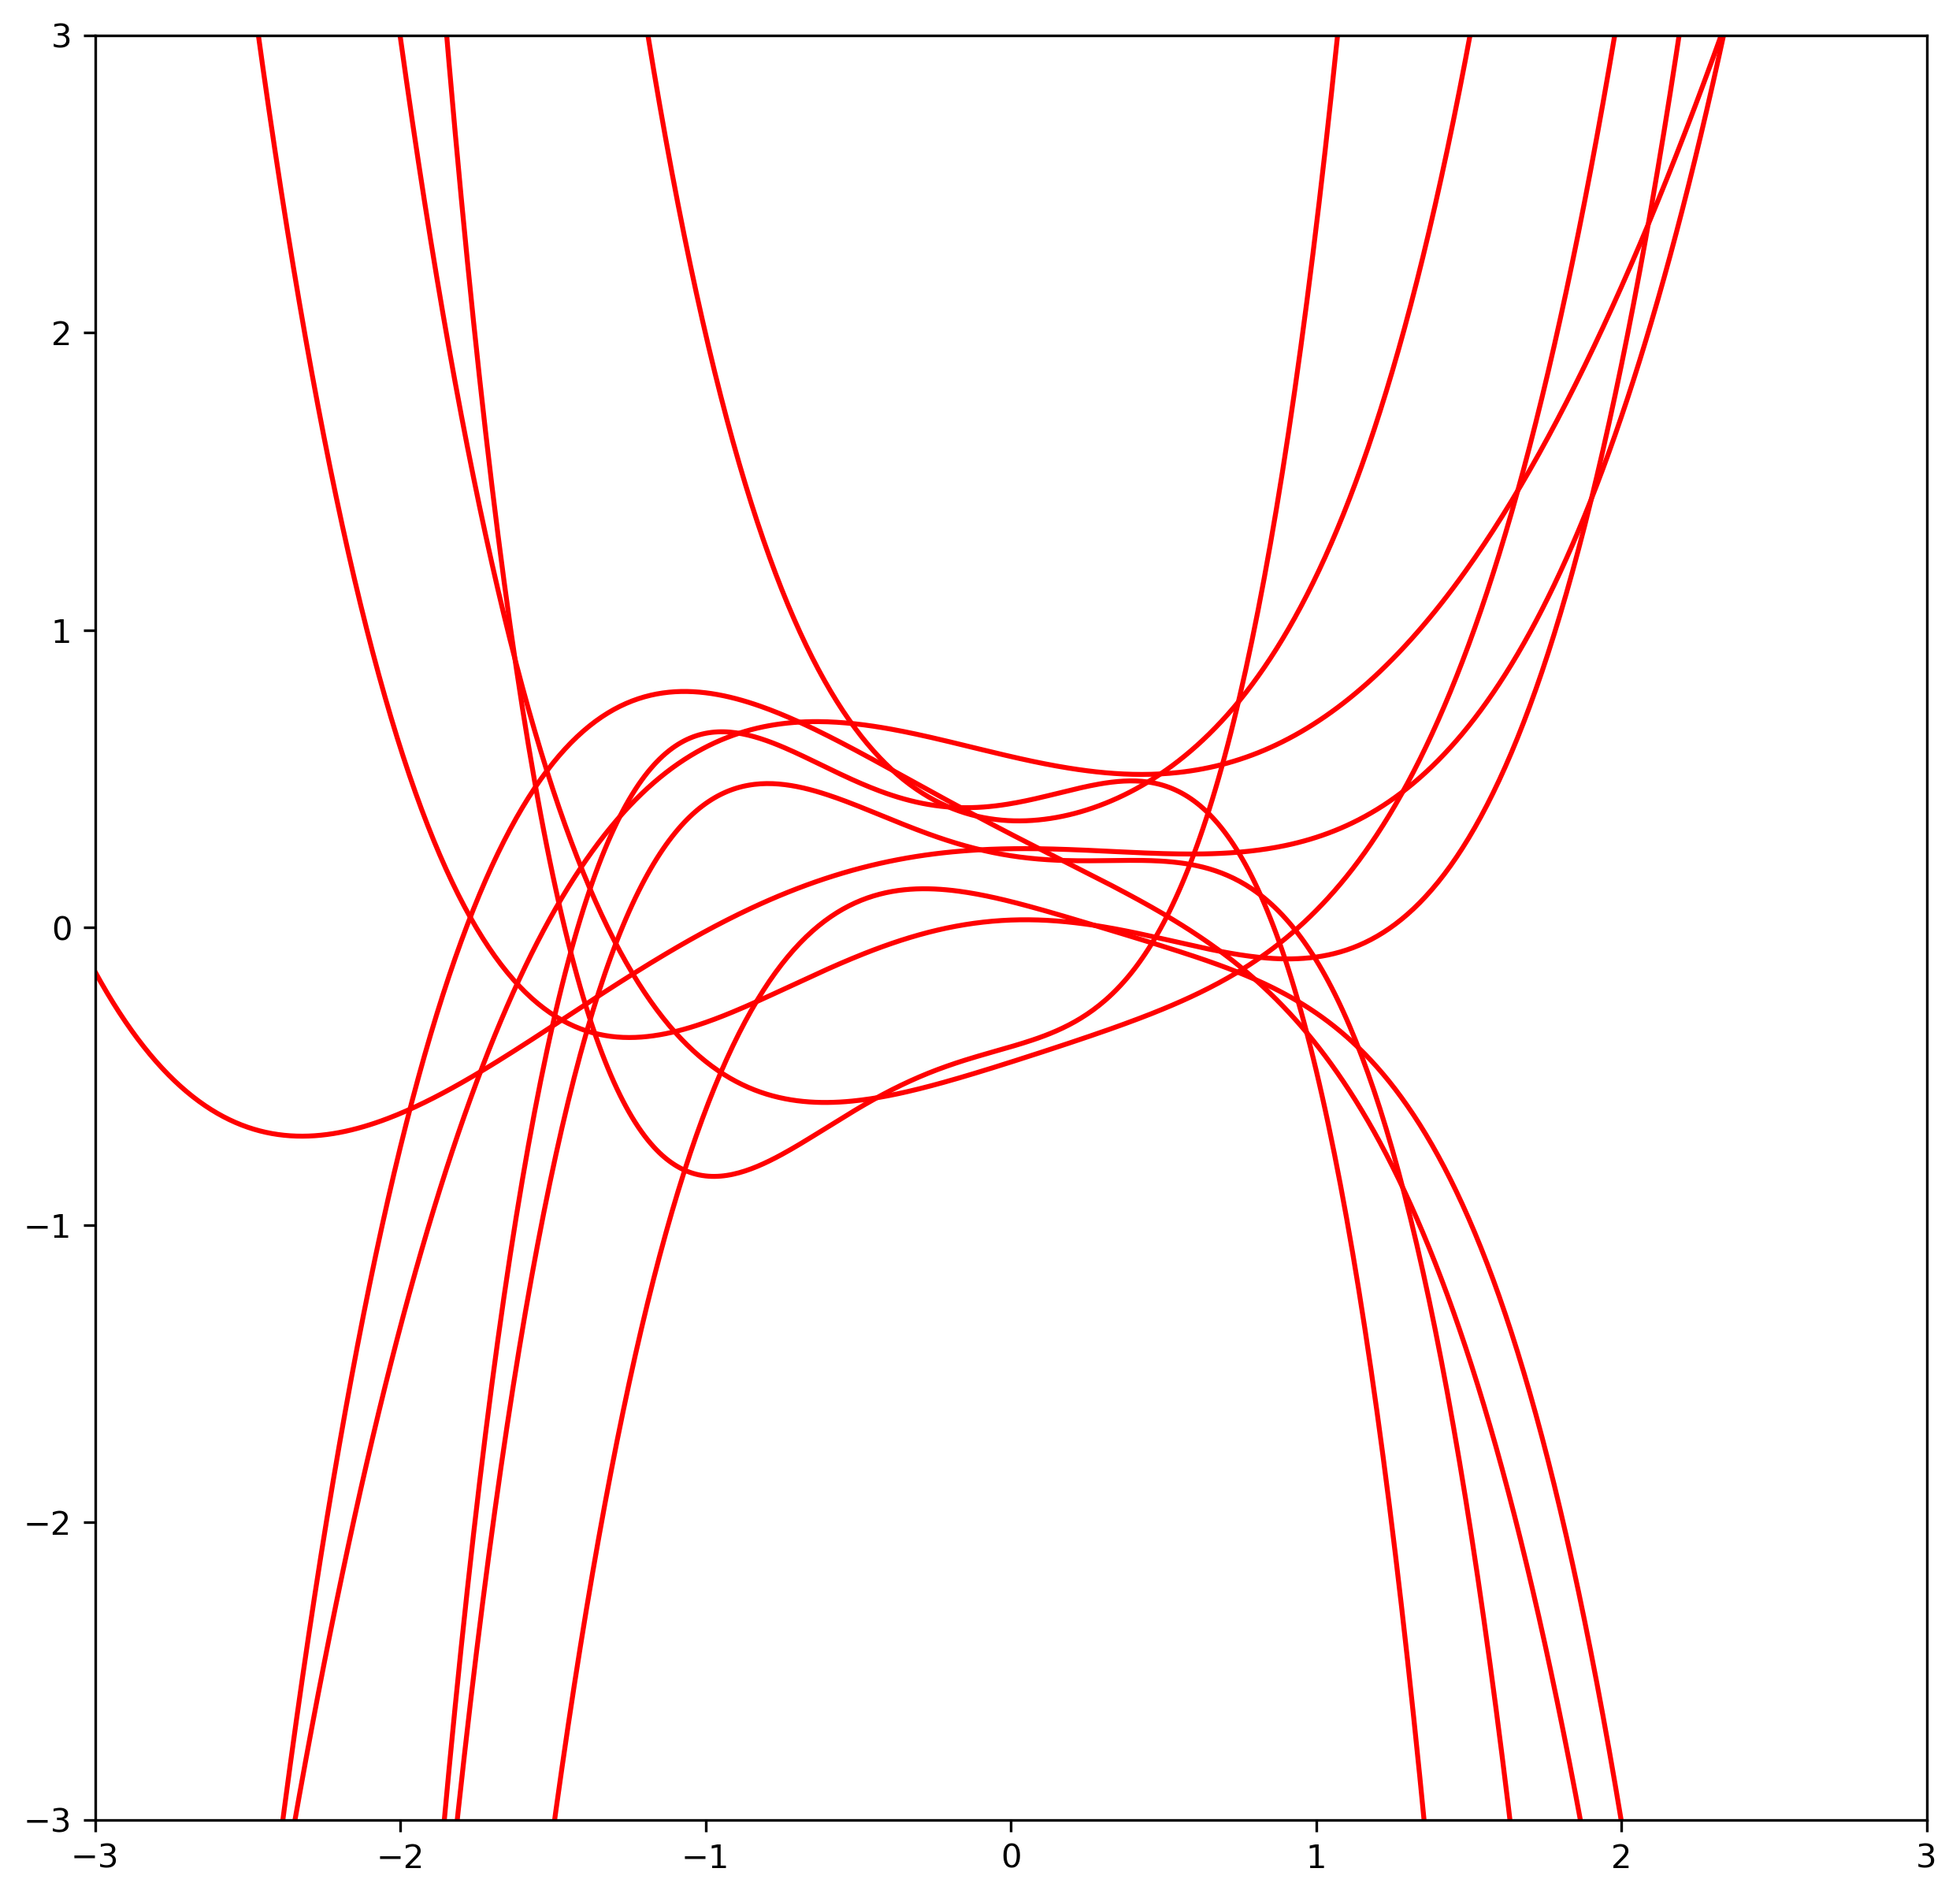

In [7]:
def draw_estimate(data, mus):
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    plt.figure(figsize=(10, 10), dpi=300)
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.show()
   
draw_estimates(10, data)

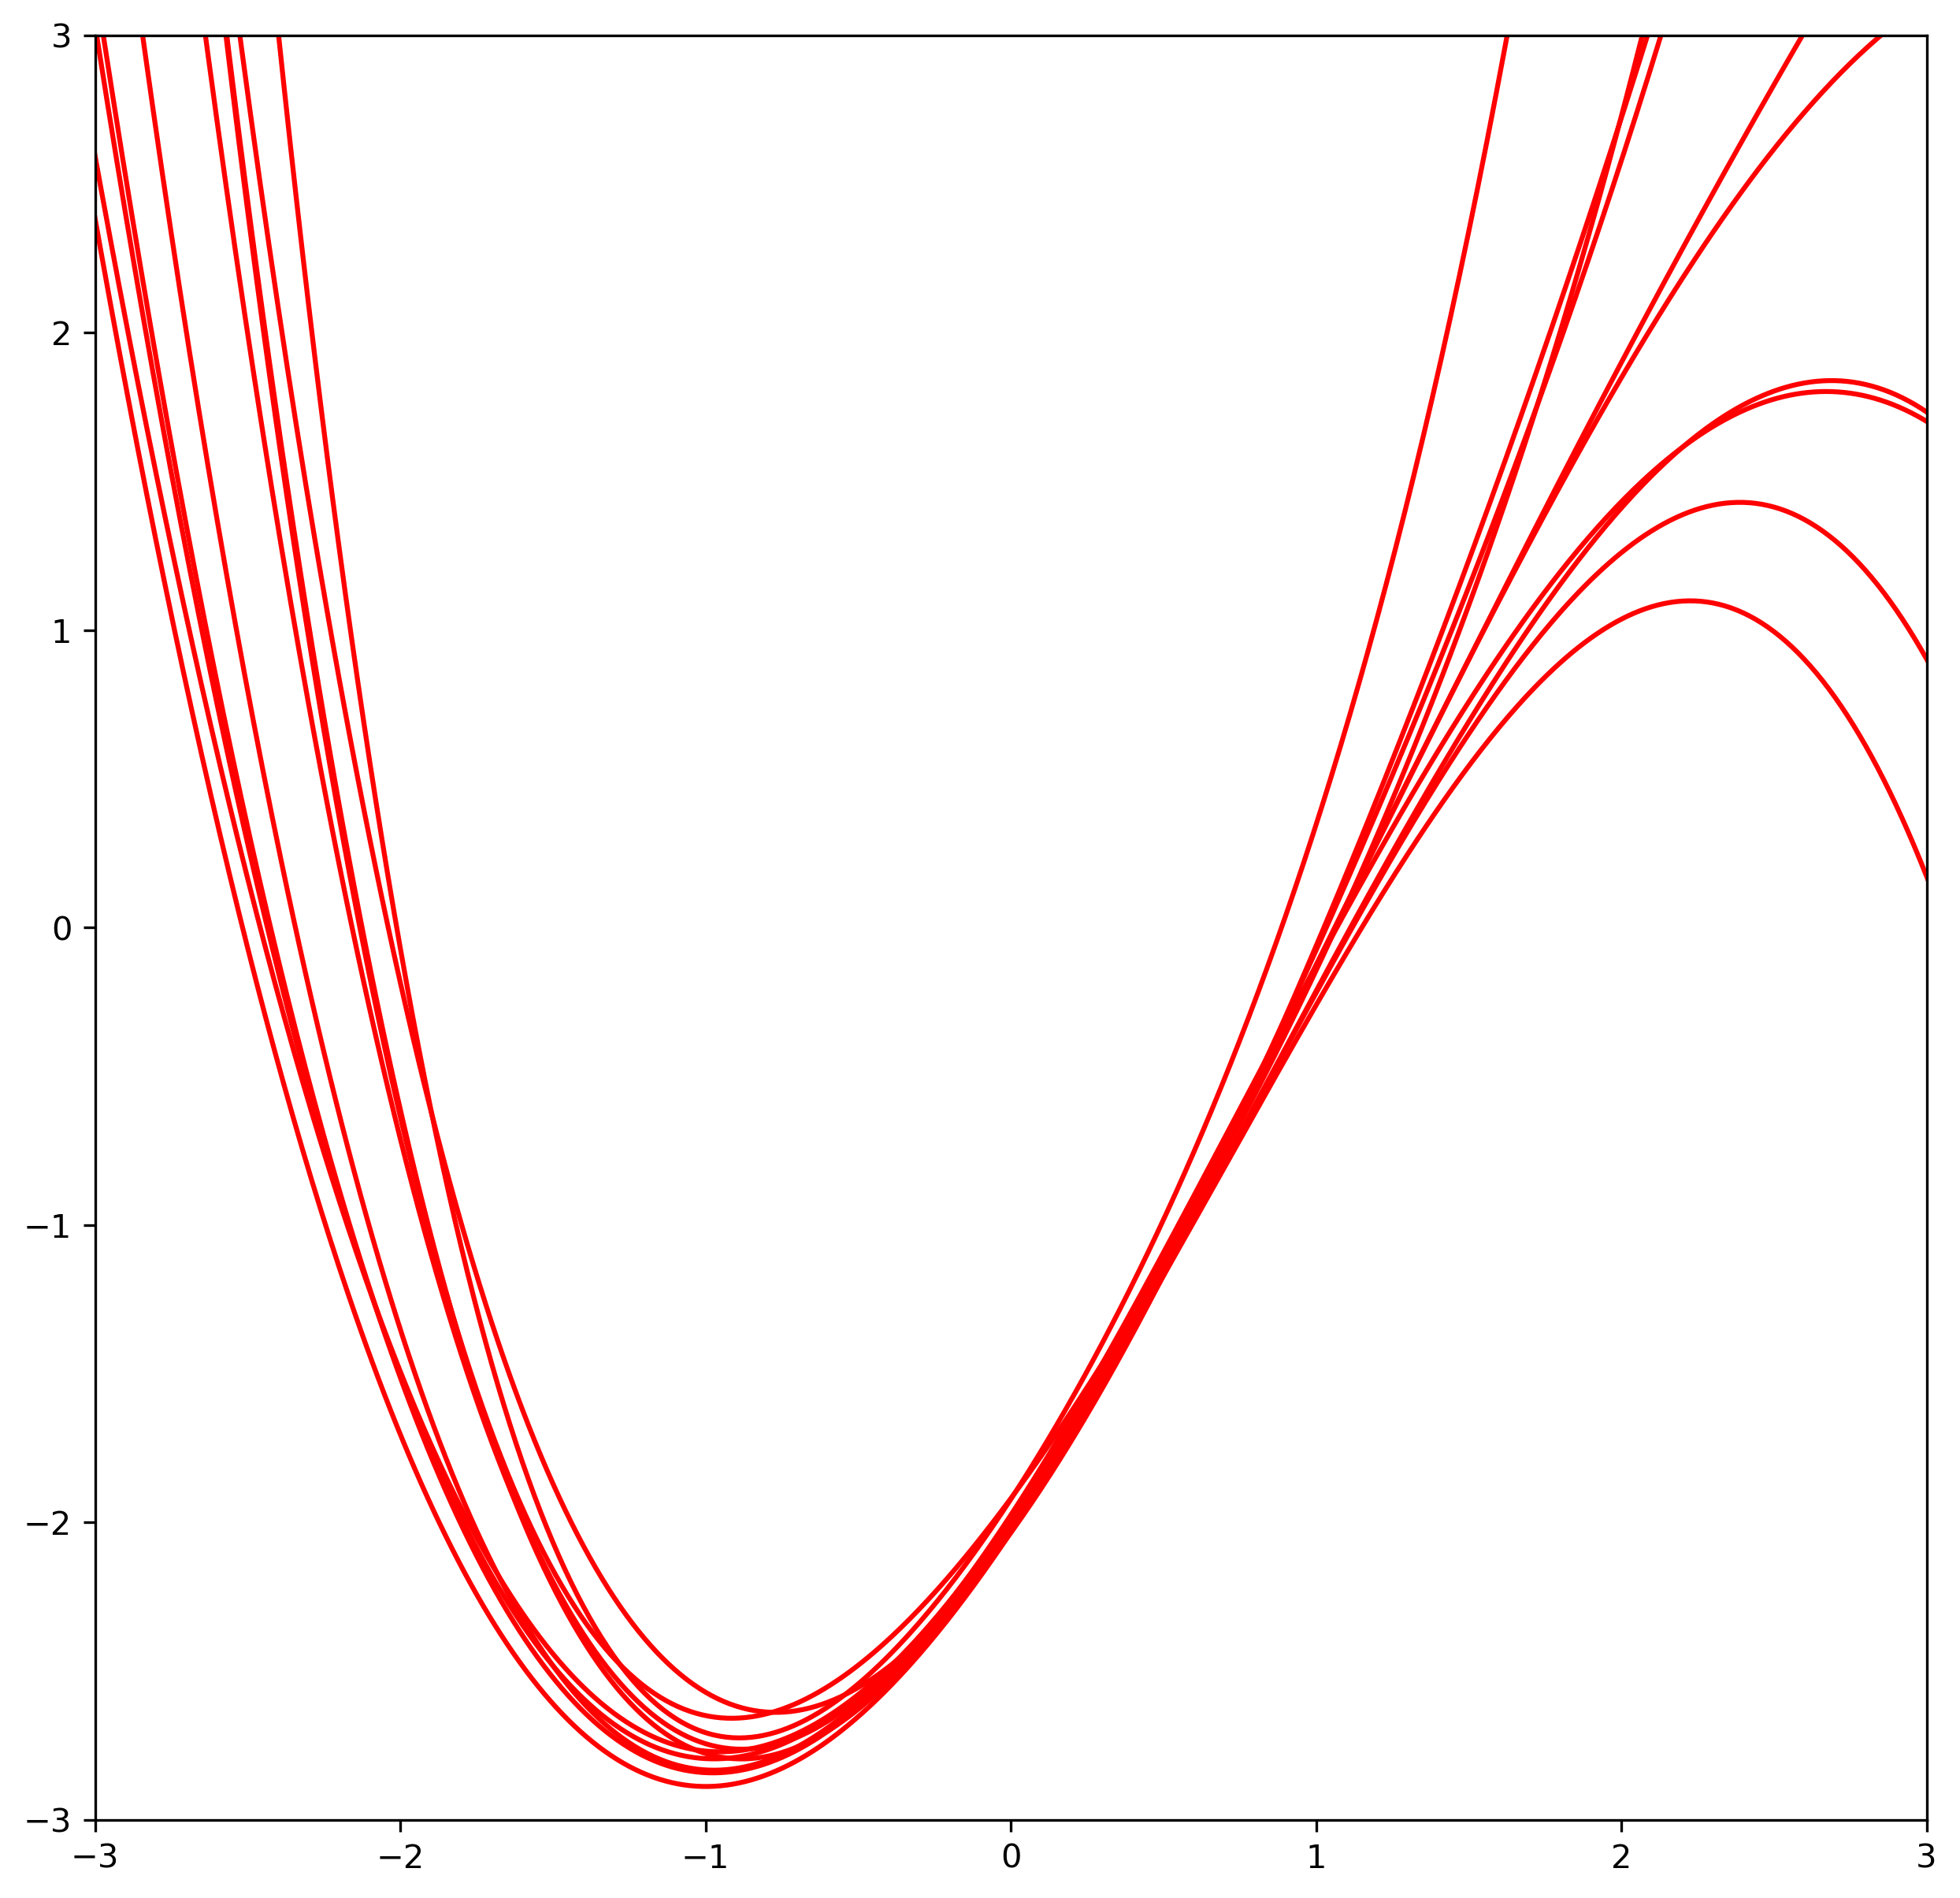

In [8]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.01]])]
gauss_lambda = [np.identity(5)*100]
w_dist = gen_w_dist(1)
draw_estimates(10, data)

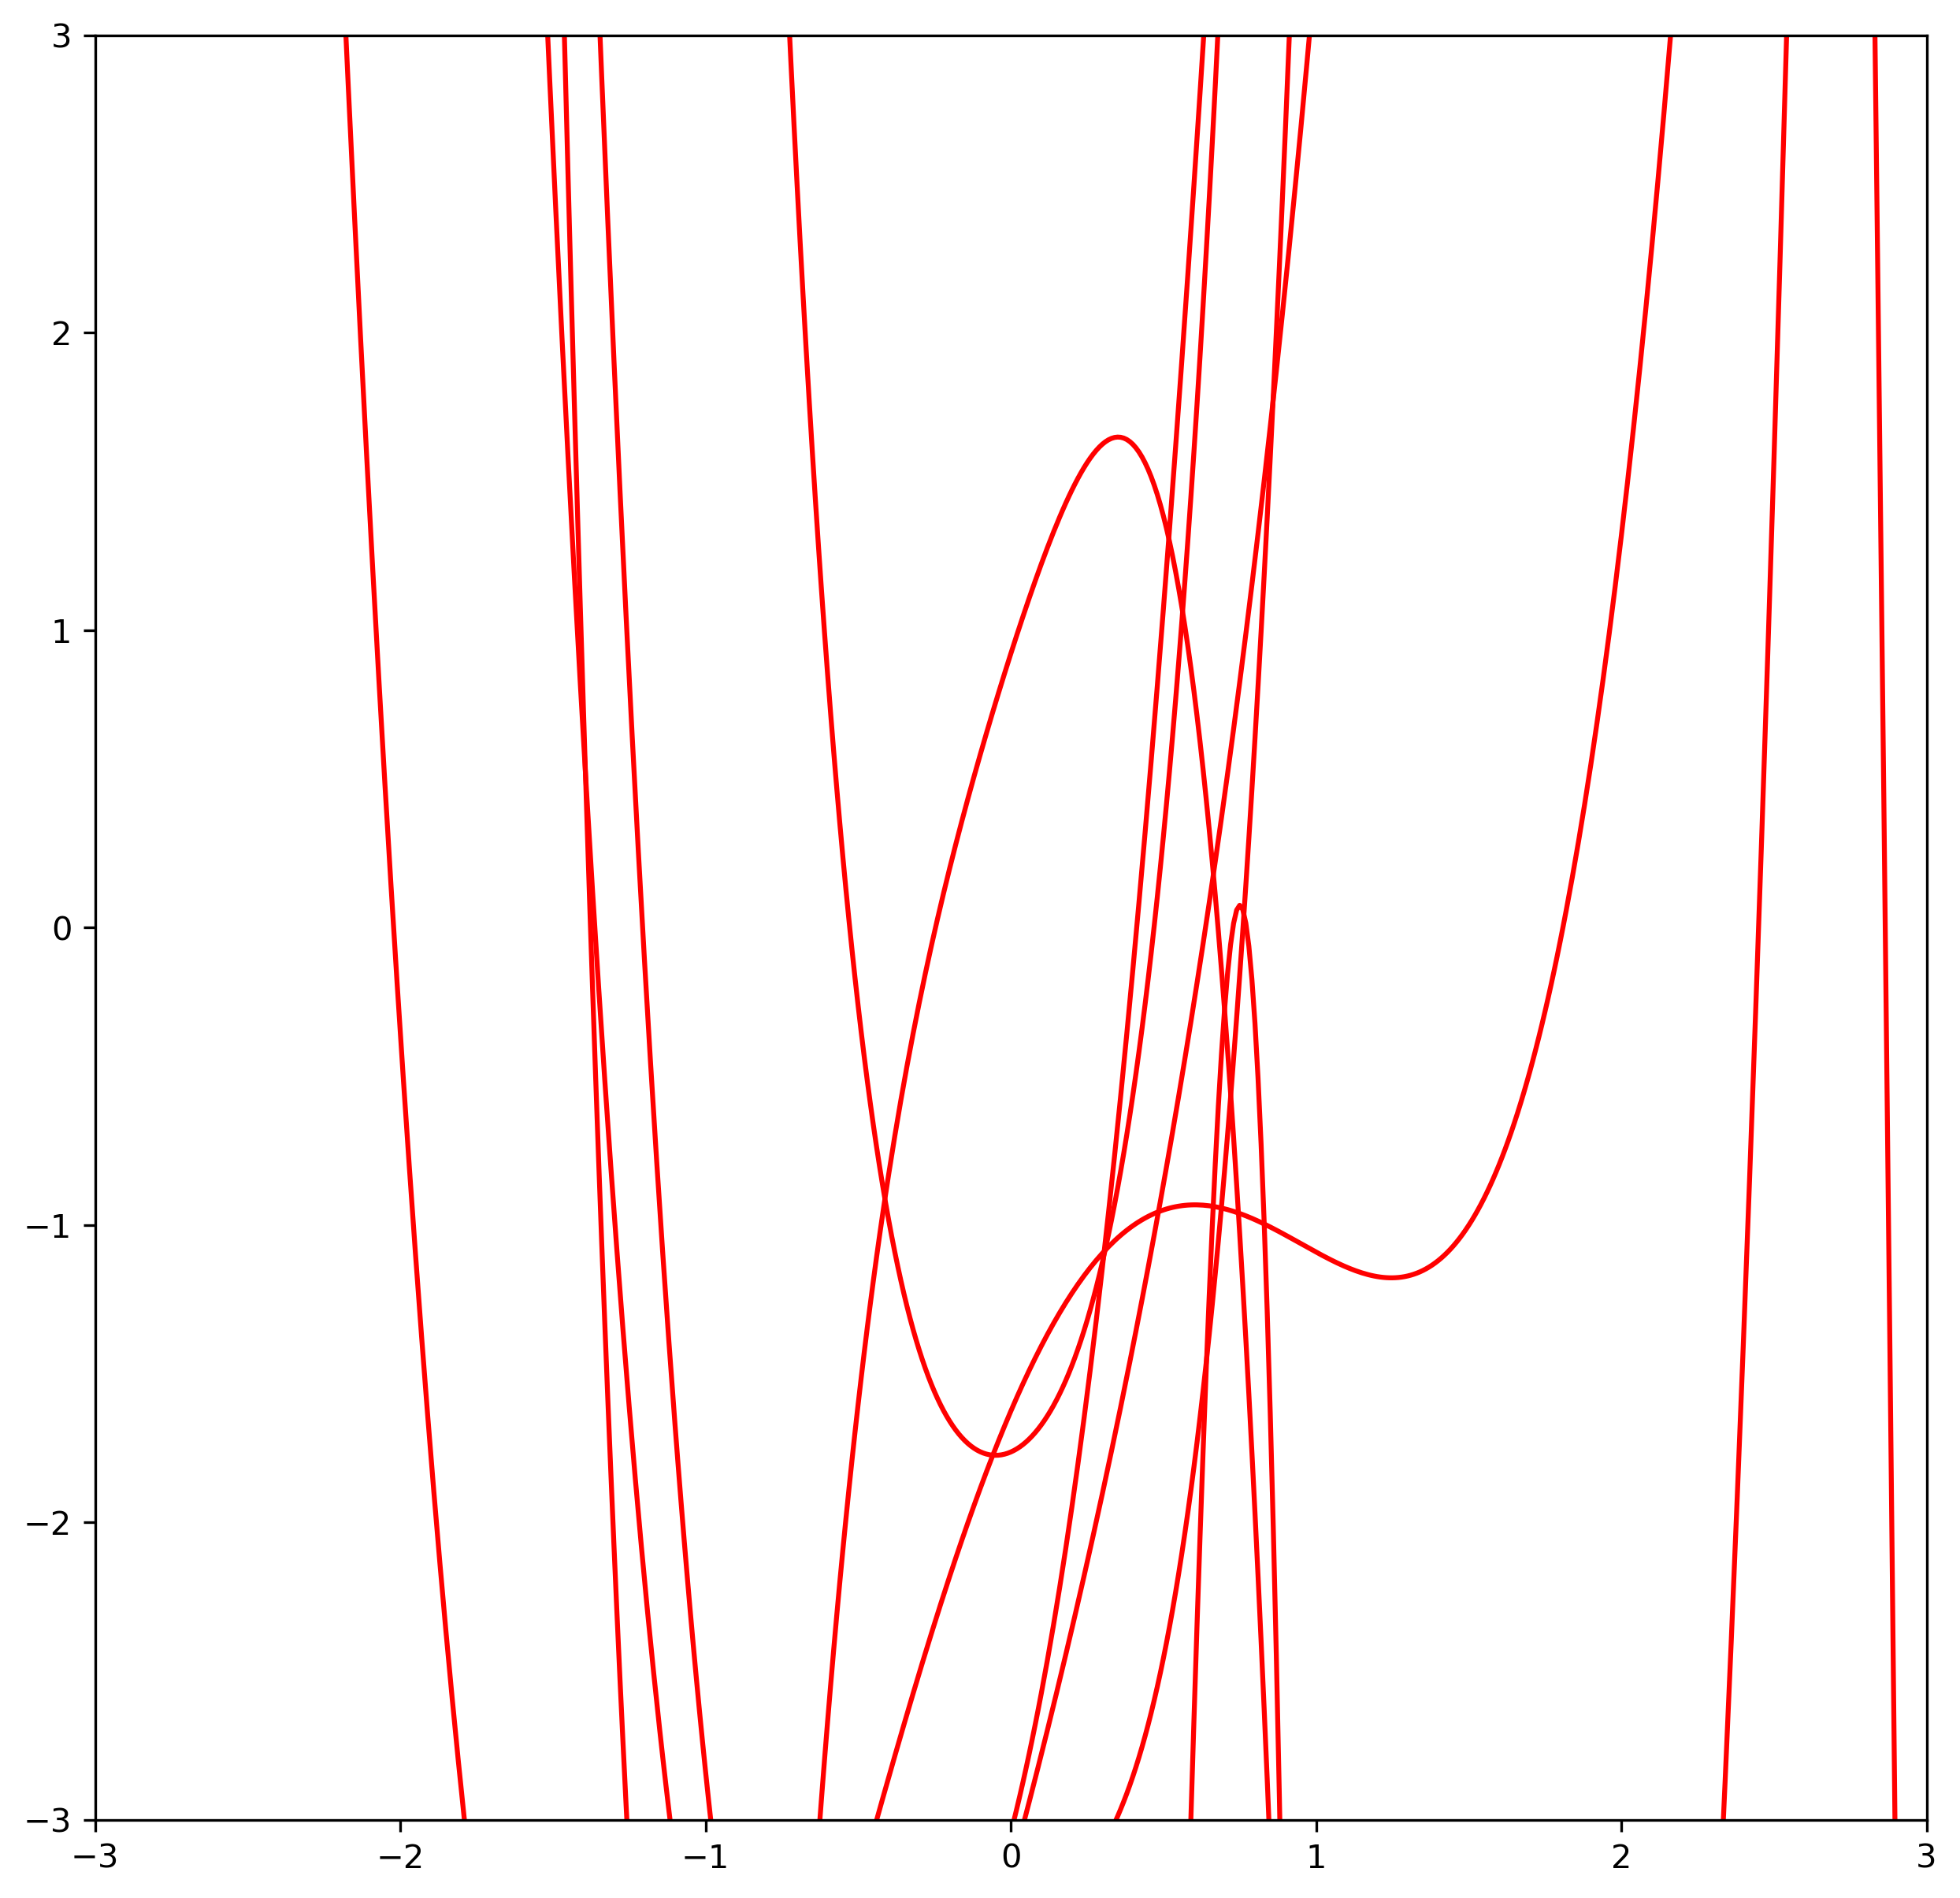

In [9]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.001]])]
gauss_lambda = [np.identity(5)*0.01]
w_dist = gen_w_dist(1)
draw_estimates(10, data)

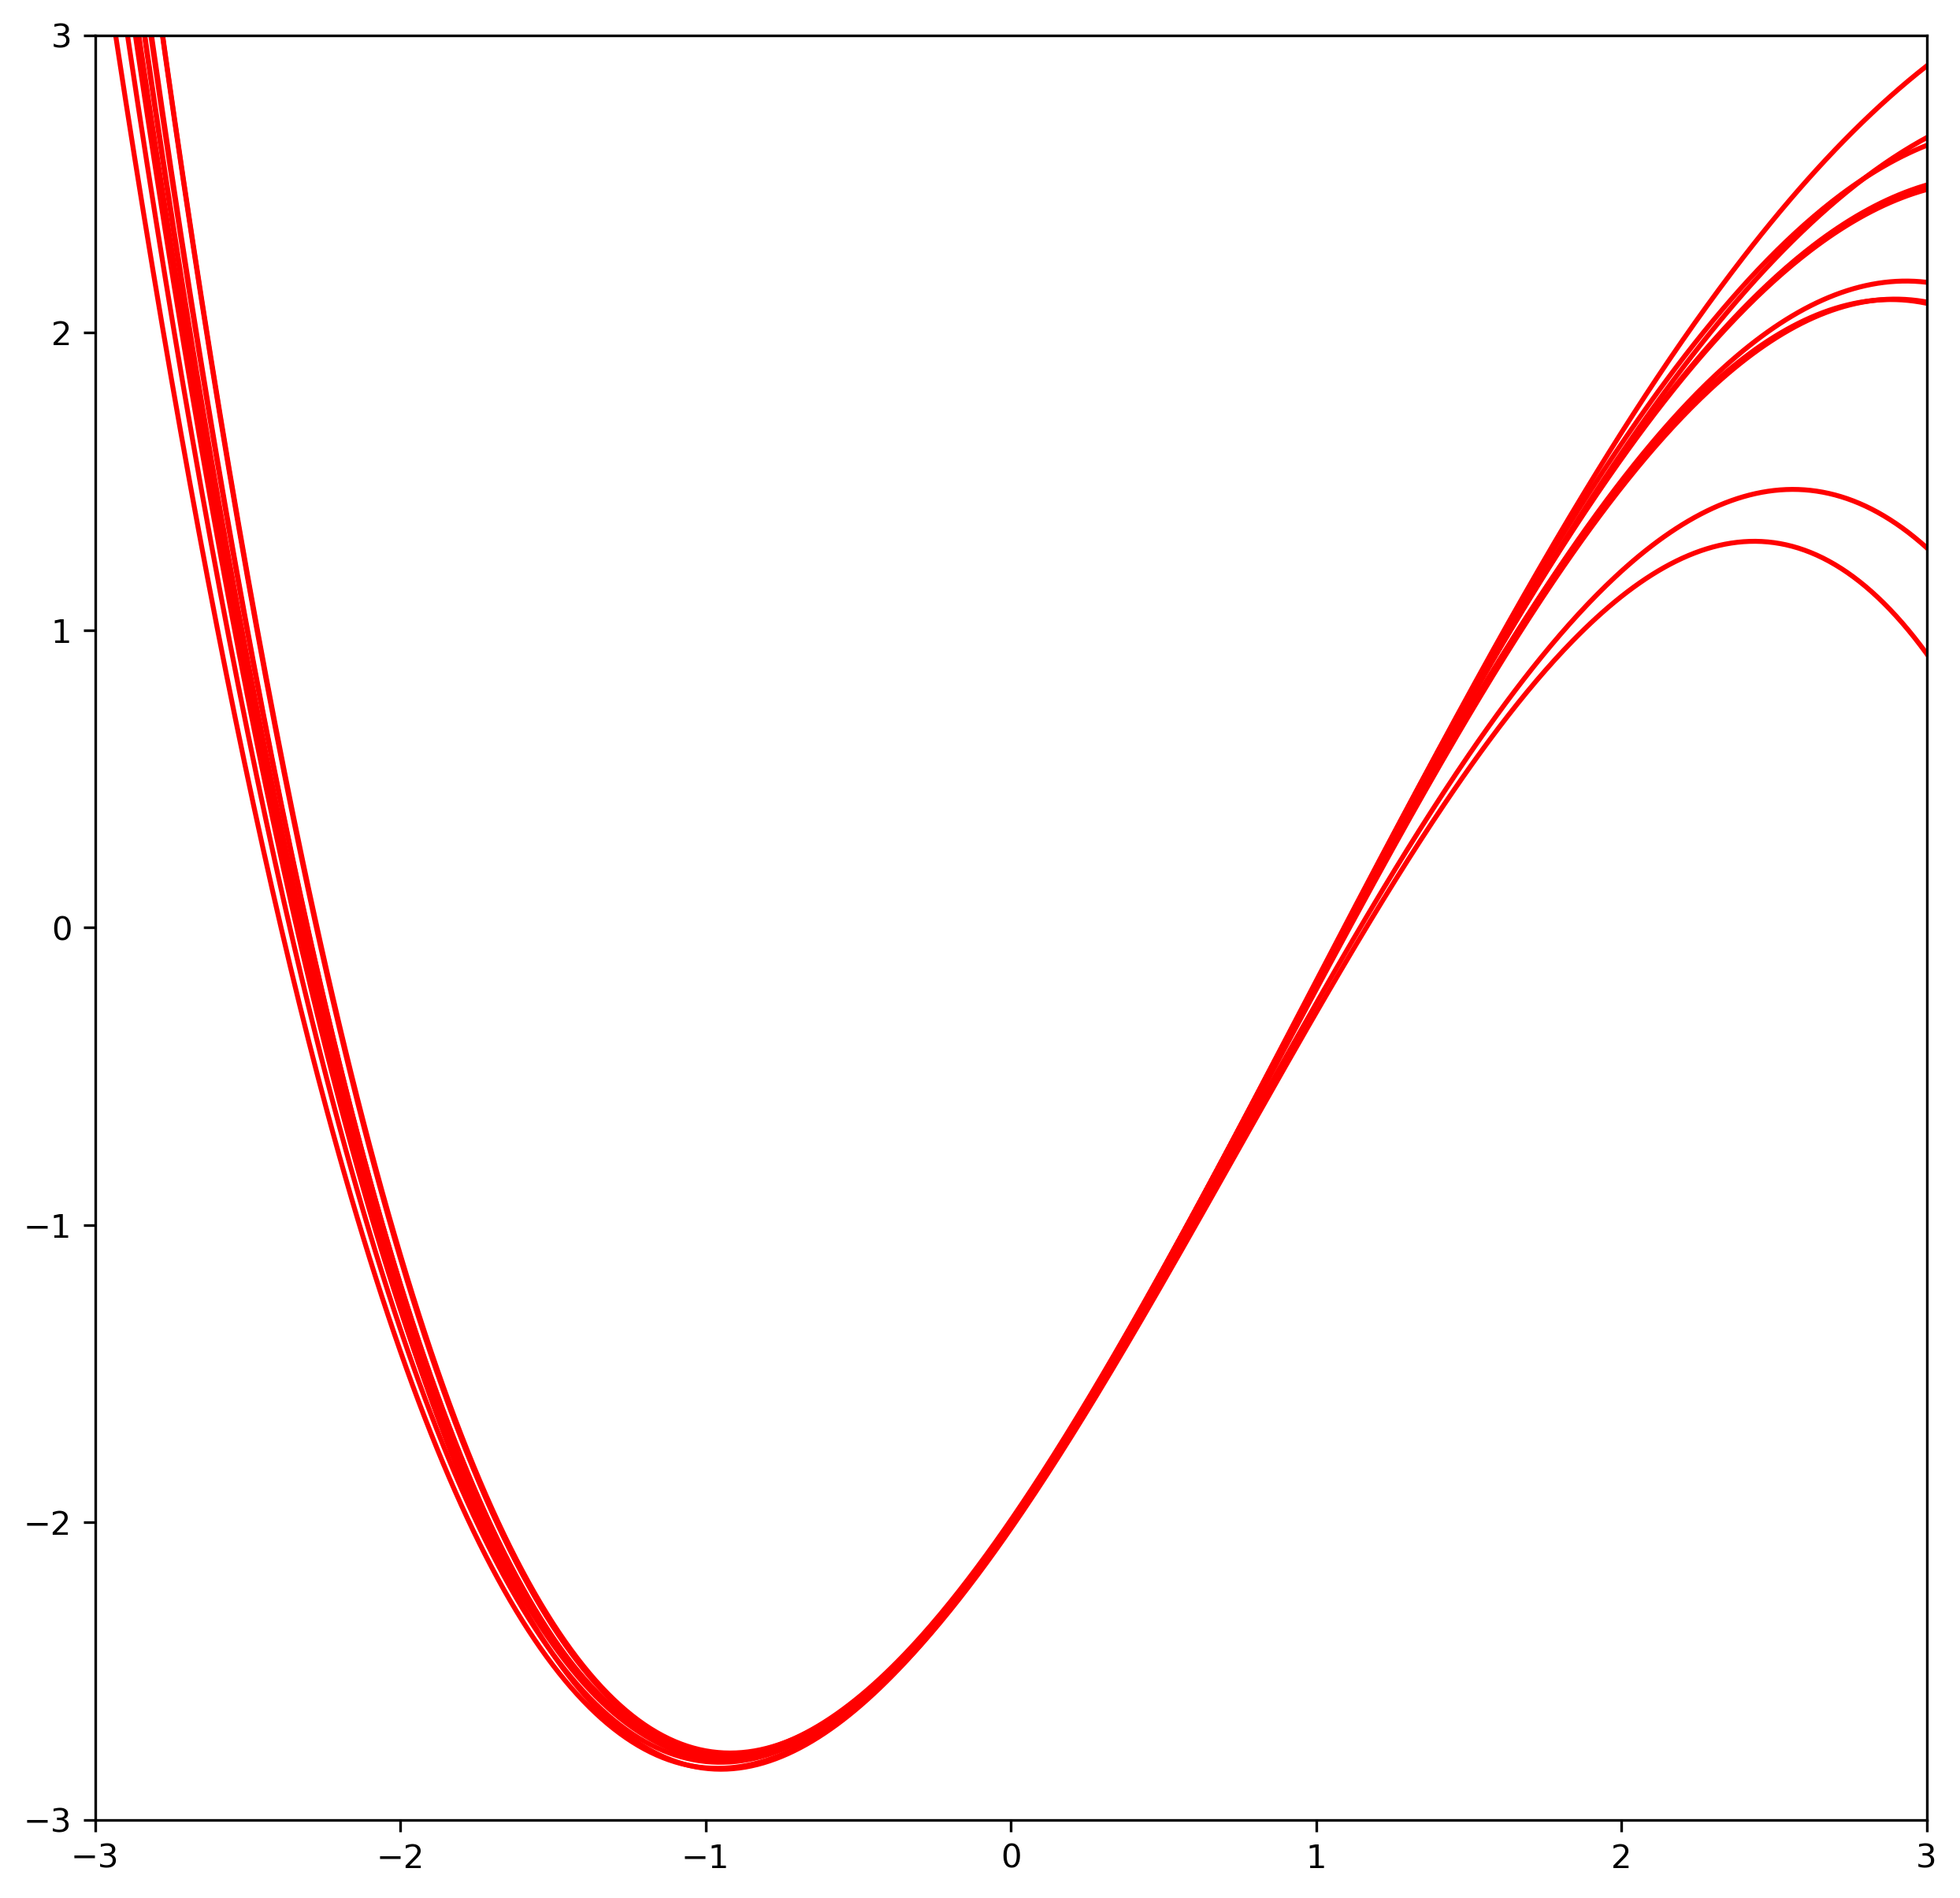

In [10]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.01]])]
gauss_lambda = [np.identity(5)*10000]
w_dist = gen_w_dist(1)
draw_estimates(10, data)